In [1]:
import os
os.__file__

'C:\\Users\\hyha1\\anaconda3\\lib\\os.py'

In [2]:
# !pip install git+http://github.com/haven-jeon/PyKoSpacing.git

In [3]:
import csv
from collections import Counter
import pandas as pd
import re
from konlpy.tag import Okt
# from pykospacing import Spacing

In [4]:
# 1. 리뷰에서 영어표현, puncation, 이모티콘은 모두 제거한다. (=한글 표현만 남긴다)
# 2. 띄어쓰기 변환기를 통해 띄어쓰기가 되어있지 않은 문장들을 제대로 변환한다.
# 3. 형태소 분석기를 통해 각각의 리뷰를 형태소 단위로 분리한다.
# 4. 한글자로 되어있는 것 제거
# 5. 빈도수가 많은 순으로 정렬 후 의미없는 단어(불용어) 제거
# 6. 최소빈도수 이하의 것들은 제거한다.
# 7. 잘못 분리 된 의미있는 단어들을 찾아서 사용자 단어 사전에 추가

In [5]:
#영어나 이모티콘 등 필요없는 문자 빼기 extract 를 사용하기 

def extract_word(text):
    hangul = re.compile('[^가-힣]') 
    result = hangul.sub(' ', str(text))
    return result

df = pd.read_csv('youtube_공조2_리뷰.csv')
df['comment'] = df['comment'].apply(lambda x:extract_word(x))


In [6]:
# #띄어쓰기 (정리하기)

# spacing = Spacing()
# df['comment'] = df['comment'].apply(lambda x:spacing(x))

In [10]:
#형태소 분석

okt = Okt()
words = " ".join(df['comment'].tolist())
words = okt.morphs(words, stem=True)

In [11]:
# print(len(words))
# print(words)
print(len(words))

17951


In [12]:
# 갯수 확인
frequent = Counter(words).most_common()
frequent

[('이', 536),
 ('하다', 388),
 ('보다', 335),
 ('에', 253),
 ('영화', 244),
 ('은', 212),
 ('가', 212),
 ('북한', 202),
 ('의', 199),
 ('공조', 173),
 ('들', 167),
 ('는', 166),
 ('을', 149),
 ('도', 144),
 ('나오다', 141),
 ('현빈', 128),
 ('재밌다', 127),
 ('진짜', 112),
 ('있다', 111),
 ('로', 107),
 ('를', 106),
 ('에서', 105),
 ('으로', 103),
 ('아니다', 100),
 ('다', 100),
 ('이다', 100),
 ('너무', 98),
 ('되다', 97),
 ('같다', 89),
 ('만', 85),
 ('좋다', 77),
 ('윤아', 77),
 ('오다', 72),
 ('불시', 67),
 ('착', 66),
 ('없다', 65),
 ('사랑', 64),
 ('가다', 63),
 ('유해진', 63),
 ('안', 62),
 ('장', 60),
 ('인', 59),
 ('왜', 59),
 ('고', 58),
 ('보고', 57),
 ('네', 57),
 ('과', 56),
 ('미화', 56),
 ('님', 55),
 ('명', 55),
 ('배우', 54),
 ('사람', 54),
 ('못', 53),
 ('것', 53),
 ('거', 52),
 ('범죄', 51),
 ('지', 50),
 ('나', 49),
 ('랑', 49),
 ('리', 48),
 ('더', 48),
 ('아', 47),
 ('한', 45),
 ('액션', 45),
 ('정혁', 45),
 ('이랑', 44),
 ('비', 44),
 ('않다', 43),
 ('한국', 43),
 ('하고', 42),
 ('저', 41),
 ('서', 41),
 ('준', 41),
 ('연기', 41),
 ('게', 41),
 ('자다', 40),
 ('크다', 39),
 ('만들다'

In [13]:
# 명사 단어 지정
# coustom_noun =["현빈", "유해진", "윤아", "다니엘헤니", "다니엘 헤니", "진선규", "장명준", "림철령", "강진태", "박민영", "잭"]

In [14]:
# 한글자로 된 단어만 따로 만들기
one_word = [x for x in words if len(x) == 1]
print(one_word, end= '')

['날', '은', '월', '일', '오', '반', '팔', '티', '굿', '즈', '중', '형', '실', '이', '은', '주', '키', '니', '님', '이', '거', '엉', '청', '는', '한', '다', '반', '의', '이', '기', '대', '씨', '첫', '충', '매', '충', '돌', '발', '외', '이', '인', '포', '인', '포', '간', '꾀', '머', '니', '상', '인', '포', '환', '전', '은', '계', '좌', '로', '젤', '인', '포', '분', '만', '원', '인', '나', '는', '만', '중', '용', '돈', '한', '고', '면', '들', '이', '뭐', '들', '만', '인', '포', '인', '유', '저', '호', '이', '이', '인', '포', '이', '한', '에', '장', '이', '거', '형', '랑', '에', '돈', '에', '한', '태', '딱', '에', '해', '이', '는', '때', '이', '거', '나', '서', '왜', '이', '너', '님', '님', '님', '개', '씬', '은', '어', '장', '명', '준', '비', '장', '명', '준', '은', '침', '중', '이', '이', '윤', '로', '일', '도', '이', '가', '끝', '편', '과', '이', '가', '은', '총', '돈', '과', '움', '방', '가', '가', '도', '잼', '존', '이', '이', '면', '을', '왜', '못', '이', '것', '놈', '뭐', '냐', '가', '네', '가', '적', '이', '를', '네', '엇', '이', '님', '비', '다', '끼', '고', '벌', '의', '뭐', '식', '의', '를', '는', '뭐', '냐', '말', '도', '통', '군', '야', '조', '에', '아', '하', '보', '로',

In [15]:
# 한글자로 된 단어들 메모장에 저장
with open('one_word.txt', 'w') as f:
    for line in one_word:
        f.write(line + ',')
    f.close()

In [16]:
# stopwords.txt 파일 이용하여 불용어 제거 
with open('stopwords.txt', 'r') as f:
    list_file = f.readlines()
stopwords = list_file[0].split(",")
remove_stopwords = [x for x in words if x not in stopwords]
len(remove_stopwords)

11583

In [17]:
# 불용어 제거 후 객체 빈도수 확인
# 갯수 확인
Counter(remove_stopwords).most_common()
len(remove_stopwords)

11583

In [18]:
# 한글자로 된 단어 메모장에 저장한 것 사용해서 제거
with open('one_word.txt', 'r') as f:
    list_file = f.readlines()
one_word = list_file[0].split(",")
one_remove_stopwords = [x for x in remove_stopwords if x not in one_word]
len(one_remove_stopwords)

8142

In [19]:
frequent_2 = Counter(one_remove_stopwords).most_common()
frequent_2

[('북한', 202),
 ('공조', 173),
 ('현빈', 128),
 ('재밌다', 127),
 ('좋다', 77),
 ('윤아', 77),
 ('불시', 67),
 ('사랑', 64),
 ('유해진', 63),
 ('미화', 56),
 ('배우', 54),
 ('사람', 54),
 ('범죄', 51),
 ('액션', 45),
 ('정혁', 45),
 ('한국', 43),
 ('연기', 41),
 ('자다', 40),
 ('크다', 39),
 ('만들다', 38),
 ('다니엘', 38),
 ('진선규', 38),
 ('더블', 34),
 ('재미있다', 31),
 ('많다', 30),
 ('생각', 30),
 ('미국', 29),
 ('얼굴', 28),
 ('빨갱이', 28),
 ('보고오다', 27),
 ('아버지', 27),
 ('재미', 27),
 ('개봉', 26),
 ('멋있다', 25),
 ('영화관', 24),
 ('도시', 24),
 ('무비', 24),
 ('맞다', 22),
 ('기대', 22),
 ('다니엘헤니', 21),
 ('웃기다', 21),
 ('영상', 21),
 ('잘생기다', 20),
 ('웃기', 20),
 ('극장', 20),
 ('코믹', 20),
 ('아주', 20),
 ('느낌', 19),
 ('추석', 19),
 ('웃다', 18),
 ('니까', 17),
 ('때리다', 17),
 ('일당백', 17),
 ('장면', 17),
 ('북괴', 17),
 ('믿다', 17),
 ('형사', 17),
 ('마지막', 16),
 ('정치국', 16),
 ('존나', 16),
 ('가족', 16),
 ('아빠', 16),
 ('늘다', 16),
 ('잡다', 16),
 ('남한', 16),
 ('하나님', 16),
 ('저렇게', 15),
 ('아들', 15),
 ('감독', 15),
 ('세상', 15),
 ('스토리', 15),
 ('철령', 15),
 ('역할', 15),
 ('그대로', 15),
 ('여자',

In [20]:
# 빈도수 1회인 것들 출력해보기

for item, count in Counter(one_remove_stopwords).most_common():
    if count==1:
        print(item)

버핏
판매
폰타나
스프
돌아오다
따흑
제거
된돠
애교
내시
베다
트팡팡
마감
방도
쏠쏠하다
즉각
원정
도로
버는중
펍가
고수
힘드다
모으다
씨오엠
저절로
치고는
온라인
접근성
소문
깊다
재키
이정
무재
액션연기
교육
컨셉
느닷없다
파견
가수
채다
예약
금칠
대서
비루
민주
유명하다
마약상
만드
치얼업
도해
대만
베트남
분노의질주
은혜
그림자
번역
서비스
기업
랭스
천억
커뮤니티
철도청
카페
라지
역대
호흡
강준
인터넷
겹치
진선
가발
후뢰시맨
라데
우스
카우라
준역
구역질
날다
여행
반미투쟁
베트남전쟁
찿아가
루트
씨발
공중파
냄새
진동
지긋지긋하다
고양이
레이저
비만
천조
천조국
문신
애니메이션
나츠메
인장
옮기다
미국영화
국힘
반공
진성
이중간첩
중용
예산
착복
기밀
누설
동맹
도발
침묵
병역
게말
시렁
치면
꼬꾸라지다
예감
끊어지다
후려
페미
공감
가극장
그딴
꾸루꿀잼
빌다
사업
리무
중대장
이버지
권력
시발
고생
햇소
비호
봉투
사형
당하
보스
차이
홧팅
랜딩
끝장
멋찌
어벙
차좀
거구
교통사고
하늘나라
또다시
고인
명복
쉐리
죽엇엉
옵니다
셨던
이미
에서나
똑바로
차려
현재
싹수
노랗다
재결합
붙이다
매끄럽다
끊기다
티나
수록
탐쿠르지
브래드피트
초딩
정은아
털다
도랏다
아닛
요가
년대
비교
모자라다
불착
기선
상관
성은
미술
음악
바레
첫씬
썩다
음식
식중독
고광렬
저격총
청소년
국가대표
고막
우린
열한
성장
우리네
여느
살아오다
니엘
헤빈
주먹
숙녀
삼만육천원
인민공화국
인식
나무
한양
미소
뭐시기
친북좌파
어보
다크나이트
그저께
마이클
감탄
신가
핏씨방
신고
흐트렸음
묵직하다
루즈
최적화
유치
찬란
완벽하다
입덕
된거
시장
금고
뒤늦다
마디
내놓다
찌르다
이성
하필
덕선
인도
머리스타일
성향
접다
유해
빈도
첫등장
적임
디네
열흘
리미트
스폰
이쉐꺄
하이라이트
슈트
의문
듭니
마는
국제
특색
호평
정돈
맡다
신파
저번
주말
크으
으으
영아
부탁
부부
어떡하다
애인
묻다
머싯다
배기
응도
가르치다
낫다
차이점
명확하다
부시
보랑
광호
가나
검색
빡

In [26]:
# 빈도수 x 회 이상 단어 담기
from tqdm import tqdm

minimum_count = 10
more_than_time= []
for i in tqdm(range(len(one_remove_stopwords))):
    tmp = one_remove_stopwords[i]
    if one_remove_stopwords.count(tmp) >= minimum_count:
        more_than_time.append(tmp)

100%|████████████████████████████████████████████████████████████████████████████| 8142/8142 [00:01<00:00, 5901.86it/s]


In [29]:
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter
import matplotlib.pyplot as plt

print(len(more_than_time))
c = Counter(more_than_time)

3304


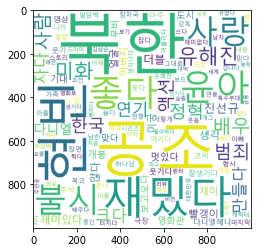

In [28]:
# 워드클라우드, 폰트설정
wc = WordCloud(font_path='c:\\Windows\\Fonts\\malgun.ttf', background_color="white", width=1000, height=1000, max_font_size=300)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)
plt.savefig('./image/공조2_리뷰.png')

In [42]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
vectorizer = CountVectorizer()

# Document Term Matrix
dtm = vectorizer.fit_transform(more_than_time)

# Term Freqeuncy
tf = pd.DataFrame(dtm.toarray(), columns = vectorizer.get_feature_names())

C:\Users\hyha1\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [44]:
tf

,강하다,개그,격감,구씨,극장,느낌,늘다,도시,리뷰,마동석,...,죽다,중간,최고,캐릭터,코믹,편이,한국,해상,해주다,형사
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6492,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6493,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6494,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df = tf.astype(bool).sum(axis = 0)
df

강하다      81
개그       60
격감       65
구씨       98
극장       50
느낌      109
늘다       81
도시      326
리뷰       59
마동석     361
만들다      83
많다       76
맞다      101
무섭다      52
미치다      51
배우      178
범죄      358
보고오다    118
빌런       90
사건       54
사람      161
생각      114
석도       50
소리       61
솔직하다     57
스토리      61
악역       78
액션      190
어제       63
연기      229
영화관     127
웃기다     142
웃다       87
이수      239
자다       90
잔인하다    112
장면       81
장첸      310
재미       84
재미있다    140
재밌다     573
존나       55
좋다      260
죽다       68
중간       54
최고       66
캐릭터      60
코믹       68
편이       58
한국       66
해상      119
해주다      57
형사       65
dtype: int64

In [46]:
# 문서 개수
D = len(tf)

# Inverse Document Frequency
idf = np.log((D+1) / (df+1)) + 1
idf

강하다     5.372377
개그      5.668222
격감      5.589441
구씨      5.183976
극장      5.847270
느낌      5.078615
늘다      5.372377
도시      3.989136
리뷰      5.684751
마동석     3.887452
만들다     5.348279
많다      5.435290
맞다      5.154123
무섭다     5.808804
미치다     5.827852
배우      4.591710
범죄      3.895773
보고오다    4.999972
빌런      5.268236
사건      5.771763
사람      4.691499
생각      5.034164
석도      5.847270
소리      5.651961
솔직하다    5.718653
스토리     5.651961
악역      5.409648
액션      4.526822
어제      5.620213
연기      4.341017
영화관     4.927066
웃기다     4.816251
웃다      5.301759
이수      4.298457
자다      5.268236
잔인하다    5.051708
장면      5.372377
장첸      4.039303
재미      5.336445
재미있다    4.830336
재밌다     3.426466
존나      5.753744
좋다      4.214575
죽다      5.544989
중간      5.771763
최고      5.574403
캐릭터     5.668222
코믹      5.544989
편이      5.701558
한국      5.574403
해상      4.991604
해주다     5.718653
형사      5.589441
dtype: float64

In [47]:
# TF-IDF
tfidf = tf * idf                      
tfidf = tfidf / np.linalg.norm(tfidf, axis = 1, keepdims = True)

In [48]:
tfidf

,강하다,개그,격감,구씨,극장,느낌,늘다,도시,리뷰,마동석,...,죽다,중간,최고,캐릭터,코믹,편이,한국,해상,해주다,형사
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6493,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
